Como Atividade 2, sugiro você aplicar mínimos quadrados no Matlab para resolver o exercício em anexo a este email. Este é outro exemplo de regressão linear, porém já é uma modelagem mais realística de um amplificador. Do ponto de vista prático, a diferença agora, em relação ao primeiro exercício, é como montar a matriz de regressão XX. Seguem abaixo mais alguns comentários específicos.

Comentários:
- os dados in e out, contidos no arquivo .mat foram medidos ao longo do tempo, para instantes igualmente espaçados;
- no modelo polinômio com memória, a saída no instante de tempo atual (n) depende da entrada aplicada no instante atual e instantes passados (n-m);
- a ideia é que você resolva o exercício apenas no Matlab, mas é também interessante manualmente você desenvolver a somatória do modelo para os primeiros instantes de tempo e também escrever as primeiras linhas do vetor Y e da matriz XX que serão usados no comando "\";
- a novidade é a obtenção da matriz XX: você pode construí-la manualmente para um caso específico de valores de P e M ou você pode recorrer ao comando "for" para obtê-la para quaisquer valores de P e M definidos inicialmente pelo usuário. Na prática, o comando "for" permite reproduzir a somatória;
- no MATLAB você consegue acessar partes de uma matriz. Ex: A(3:7,2:end) significa linhas de 3 a 7 e colunas de 2 até a última. Em um código mais eficiente, você escreveria uma coluna completa por vez da matriz XX;
- cada coluna da matriz de regressão XX deve conter uma determinada função da entrada que então será multiplicada por um coeficiente em específico. Assim, a coluna 1 contém a entrada atual, a coluna 2 a entrada passada, a coluna 3 o quadrado da entrada atual, etc.


In [1]:
from functions import *
mat = loadmat('IN_OUT_PA.mat')

in_data = mat['in']
out_data = mat['out']

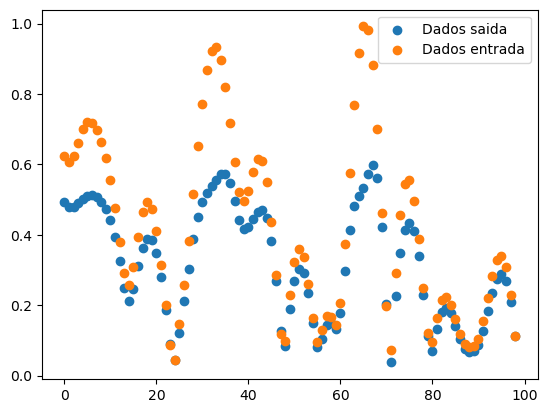

In [2]:
import matplotlib.pyplot as plt
x = range(0,len(in_data))

plt.scatter(x,out_data, label='Dados saida')
plt.scatter(x, in_data,  label='Dados entrada')
plt.legend()
plt.show()

In [3]:
import numpy as np
# definir valores de P e M
P = 9 
M = 4

n = len(in_data) # número total de amostras
XX = np.zeros((n - M, P))
for i in range(M, n):
    XX[i-M, 0] = in_data[i][0]
    for j in range(1, P):
        XX[i-M, j] = in_data[i-j][0] ** j


coefficients, _, _, _  = np.linalg.lstsq(XX, out_data[M:], rcond=None)

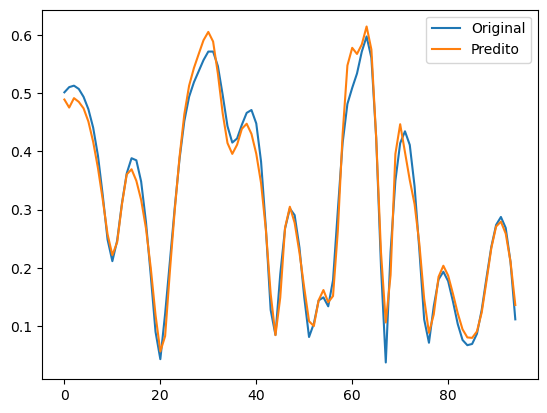

In [4]:
predicted = XX @ coefficients
plt.plot(out_data[M:], label='Original')
plt.plot(predicted, label='Predito')
plt.legend()
plt.show()